# Exploratory Data Analysis (EDA) - Recipe Recommender
This notebook explores the recipes and reviews datasets to understand the distributions and patterns.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to path
sys.path.append('..')

from src.data_loader import DataLoader

sns.set_theme(style="whitegrid")

In [2]:
path = '/Users/mhnguyetvu/projects/MINDX/Recommendation/Recipe-Recommender/data/reviews.parquet'
size_bytes = os.path.getsize(path)
print(f"{size_bytes/1024**3:.2f} GB")

0.16 GB


## Import data

In [4]:
loader = DataLoader(data_dir="../data")
recipes = loader.load_recipes()
reviews = loader.load_reviews()

print(f"Recipes shape: {recipes.shape}")
print(f"Reviews shape: {reviews.shape}")

Recipes shape: (522517, 28)
Reviews shape: (1401982, 8)



--- Recipes Schema ---
Schema([('RecipeId', Float64), ('Name', String), ('AuthorId', Int32), ('AuthorName', String), ('CookTime', String), ('PrepTime', String), ('TotalTime', String), ('DatePublished', Datetime(time_unit='us', time_zone='UTC')), ('Description', String), ('Images', List(String)), ('RecipeCategory', String), ('Keywords', List(String)), ('RecipeIngredientQuantities', List(String)), ('RecipeIngredientParts', List(String)), ('AggregatedRating', Float64), ('ReviewCount', Int32), ('Calories', Float64), ('FatContent', Float64), ('SaturatedFatContent', Float64), ('CholesterolContent', Float64), ('SodiumContent', Float64), ('CarbohydrateContent', Float64), ('FiberContent', Float64), ('SugarContent', Float64), ('ProteinContent', Float64), ('RecipeServings', Int32), ('RecipeYield', String), ('RecipeInstructions', List(String))])

--- Sample Recipes ---
shape: (5, 28)
┌──────────┬────────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ RecipeId ┆ 

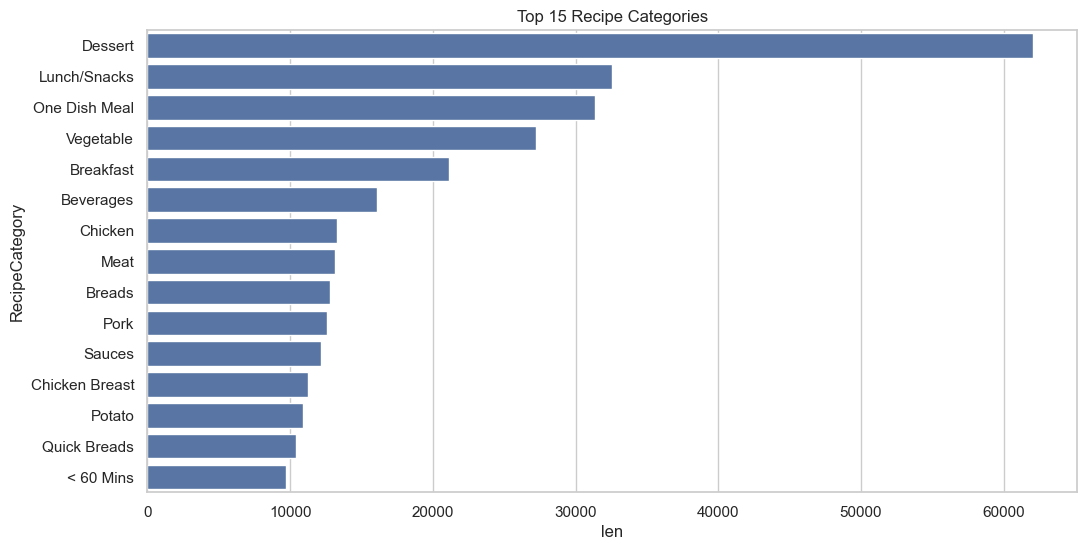

In [ ]:
print("\n--- Sample Recipes ---")
print(recipes.head())

if "RecipeCategory" in recipes.columns:
    plt.figure(figsize=(12, 6))
    category_counts = recipes.group_by("RecipeCategory").len().sort("len", descending=True).head(15)
    sns.barplot(data=category_counts.to_pandas(), x="len", y="RecipeCategory")
    plt.title("Top 15 Recipe Categories")
    plt.show()


--- Ratings Distribution ---
shape: (6, 2)
┌────────┬─────────┐
│ Rating ┆ len     │
│ ---    ┆ ---     │
│ i32    ┆ u32     │
╞════════╪═════════╡
│ 0      ┆ 76248   │
│ 1      ┆ 16559   │
│ 2      ┆ 17597   │
│ 3      ┆ 50279   │
│ 4      ┆ 229217  │
│ 5      ┆ 1012082 │
└────────┴─────────┘


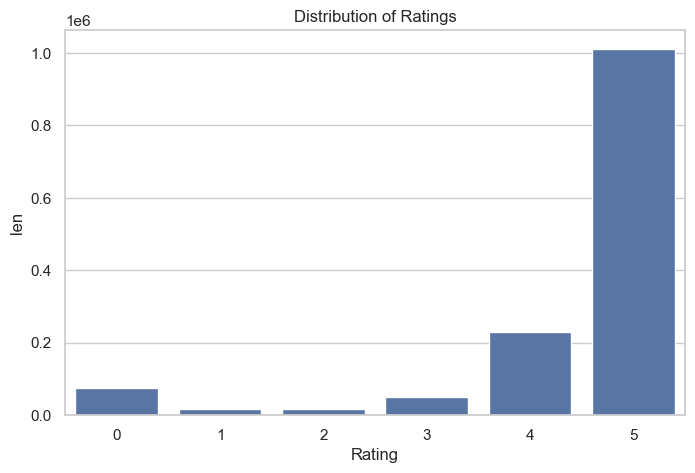

In [6]:
print("\n--- Ratings Distribution ---")
rating_dist = reviews.group_by("Rating").len().sort("Rating")
print(rating_dist)

plt.figure(figsize=(8, 5))
sns.barplot(data=rating_dist.to_pandas(), x="Rating", y="len")
plt.title("Distribution of Ratings")
plt.show()

## Recipe data analysis

In [7]:
recipes.describe().show()

statistic,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
str,f64,str,f64,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""",522517.0,"""522517""",522517.0,"""522517""","""439972""","""522517""","""522517""","""522517""","""522512""",522516.0,"""521766""",522517.0,522517.0,522517.0,269294.0,275028.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,522517.0,339606.0,"""174446""",522517.0
"""null_count""",0.0,"""0""",0.0,"""0""","""82545""","""0""","""0""","""0""","""5""",1.0,"""751""",0.0,0.0,0.0,253223.0,247489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182911.0,"""348071""",0.0
"""mean""",271821.43697,null,4.5726e7,null,null,null,null,"""2008-01-18 06:34:47.071884+00:…",null,null,null,null,null,null,4.632014,5.227784,484.43858,24.614922,9.559457,86.487003,767.263878,49.089092,3.843242,21.878254,17.46951,8.606191,null,null
"""std""",155495.878422,null,2.9297e8,null,null,null,null,null,null,null,null,null,null,null,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4203.620531,180.822062,8.603163,142.620191,40.128837,114.319809,null,null
"""min""",38.0,"""! Go Cold Turkey With Cucumbe…",27.0,"""- Andy""","""PT1008H""","""PT-1M""","""PT-2M""","""1999-08-06 00:40:00+00:00""","""! DO NOT ATTEMPT IF YOU DO NOT…",null,"""< 15 Mins""",null,null,null,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"""1""",null


In [8]:
recipes.head(2)

RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
f64,str,i32,str,str,str,str,"datetime[μs, UTC]",str,list[str],str,list[str],list[str],list[str],f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,list[str]
38.0,"""Low-Fat Berry Blue Frozen Dess…",1533,"""Dancer""","""PT24H""","""PT45M""","""PT24H45M""",1999-08-09 21:46:00 UTC,"""Make and share this Low-Fat Be…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg"", ""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg"", … ""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg""]","""Frozen Desserts""","[""Dessert"", ""Low Protein"", … ""Easy""]","[""4"", ""1⁄4"", … ""1""]","[""blueberries"", ""granulated sugar"", … ""lemon juice""]",4.5,4,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4,null,"[""Toss 2 cups berries with sugar."", ""Let stand for 45 minutes, stirring occasionally."", … ""Pour into plastic mold and freeze overnight. Let soften slightly to serve.""]"
39.0,"""Biryani""",1567,"""elly9812""","""PT25M""","""PT4H""","""PT4H25M""",1999-08-29 13:12:00 UTC,"""Make and share this Biryani re…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/39/picM9Mhnw.jpg"", ""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/39/picHv4Ocr.jpg""]","""Chicken Breast""","[""Chicken Thigh & Leg"", ""Chicken"", … ""Stove Top""]","[""1"", ""4"", … ""6""]","[""saffron"", ""milk"", … ""eggs""]",3.0,1,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6,null,"[""Soak saffron in warm milk for 5 minutes and puree in blender."", ""Add chiles, onions, ginger, garlic, cloves, peppercorns, cardamom seeds, cinnamon, coriander and cumin seeds, poppy seeds, nutmeg, mace, cilantro or mint leaves and lemon juice. Blend into smooth paste. Put paste into large bowl, add yogurt and mix well."", … ""Add reserved onion as garnish.""]"


## Rating data analysis

In [9]:
reviews.head()

ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
i32,i32,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]"
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC
7,4384,1634,"""Bill Hilbrich""",4,"""I cut back on the mayo, and ma…",2001-10-17 16:49:59 UTC,2001-10-17 16:49:59 UTC
9,4523,2046,"""Gay Gilmore ckpt""",2,"""i think i did something wrong …",2000-02-25 09:00:00 UTC,2000-02-25 09:00:00 UTC
13,7435,1773,"""Malarkey Test""",5,"""easily the best i have ever ha…",2000-03-13 21:15:00 UTC,2000-03-13 21:15:00 UTC
14,44,2085,"""Tony Small""",5,"""An excellent dish.""",2000-03-28 12:51:00 UTC,2000-03-28 12:51:00 UTC


In [10]:
# Polars equivalent for value_counts and proportion calculation
rating_counts = reviews.group_by("Rating").len().sort("Rating")
print(rating_counts)

total_ratings = reviews["Rating"].sum()
reviews_proportion = reviews.with_columns((pl.col("Rating") / total_ratings).alias("proportion"))
reviews_proportion.head()

shape: (6, 2)
┌────────┬─────────┐
│ Rating ┆ len     │
│ ---    ┆ ---     │
│ i32    ┆ u32     │
╞════════╪═════════╡
│ 0      ┆ 76248   │
│ 1      ┆ 16559   │
│ 2      ┆ 17597   │
│ 3      ┆ 50279   │
│ 4      ┆ 229217  │
│ 5      ┆ 1012082 │
└────────┴─────────┘


ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,proportion
i32,i32,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]",f64
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC,8.0908e-7
7,4384,1634,"""Bill Hilbrich""",4,"""I cut back on the mayo, and ma…",2001-10-17 16:49:59 UTC,2001-10-17 16:49:59 UTC,6.4726e-7
9,4523,2046,"""Gay Gilmore ckpt""",2,"""i think i did something wrong …",2000-02-25 09:00:00 UTC,2000-02-25 09:00:00 UTC,3.2363e-7
13,7435,1773,"""Malarkey Test""",5,"""easily the best i have ever ha…",2000-03-13 21:15:00 UTC,2000-03-13 21:15:00 UTC,8.0908e-7
14,44,2085,"""Tony Small""",5,"""An excellent dish.""",2000-03-28 12:51:00 UTC,2000-03-28 12:51:00 UTC,8.0908e-7


In [11]:
## Map with recipe dataa
reviews = reviews.with_columns(pl.col("RecipeId").cast(pl.Int64))
recipes = recipes.with_columns(pl.col("RecipeId").cast(pl.Int64))
recipe_with_review = reviews.join(recipes, on="RecipeId", how="inner")
recipe_with_review.head(1)

ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_right,AuthorName_right,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
i32,i64,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]",str,i32,str,str,str,str,"datetime[μs, UTC]",str,list[str],str,list[str],list[str],list[str],f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,list[str]
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC,"""Jalapeno Pepper Poppers""",1545,"""Nancy Van Ess""",null,"""PT30M""","""PT30M""",1999-09-06 04:28:00 UTC,"""Make and share this Jalapeno P…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/99/2/picAR6FvM.jpg""]","""Vegetable""","[""< 30 Mins"", ""For Large Groups""]","[""8"", ""4"", … null]","[""cream cheese"", ""sharp cheddar cheese"", … ""garlic powder""]",5.0,15,111.4,9.2,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24,null,"[""In a mixing bowl, combine cheeses, bacon and seasonings.; mix well."", ""Spoon about 2 Tbs. into each pepper half."", … ""NOTES : When cutting or seeding hot peppers, use rubber or plastic gloves to protect your hands. avoid touching your face. I omit the bacon in this recipe.""]"


In [12]:
# Ranked list of recipeId by highest sum of rating
ranked_recipes = recipe_with_review.group_by("RecipeCategory").agg(pl.col("Rating").sum().alias("TotalRating")).sort("TotalRating", descending=True)
print(ranked_recipes)
ranked_recipes.head(10).show()

shape: (291, 2)
┌─────────────────┬─────────────┐
│ RecipeCategory  ┆ TotalRating │
│ ---             ┆ ---         │
│ str             ┆ i32         │
╞═════════════════╪═════════════╡
│ Dessert         ┆ 605020      │
│ One Dish Meal   ┆ 434566      │
│ Lunch/Snacks    ┆ 424157      │
│ Vegetable       ┆ 329075      │
│ Breakfast       ┆ 263177      │
│ …               ┆ …           │
│ Snacks Sweet    ┆ 4           │
│ Somalian        ┆ 3           │
│ Black Bean Soup ┆ 3           │
│ Pot Roast       ┆ 0           │
│ From Scratch    ┆ 0           │
└─────────────────┴─────────────┘


RecipeCategory,TotalRating
str,i32
"""Dessert""",605020
"""One Dish Meal""",434566
"""Lunch/Snacks""",424157
"""Vegetable""",329075
"""Breakfast""",263177


# Preprocessing

In [13]:
import importlib
from src.preprocessing import DataPreprocessor
importlib.reload(importlib.import_module("src.preprocessing"))

<module 'src.preprocessing' from '/Users/mhnguyetvu/projects/MINDX/Recommendation/Recipe-Recommender/notebooks/../src/preprocessing.py'>

# Baseline A: Gợi ý theo độ phổ biến (Popularity)

Trong phần này, chúng ta sẽ xây dựng baseline đơn giản nhất cho hệ thống gợi ý công thức nấu ăn:
- Gợi ý các công thức có nhiều đánh giá tích cực nhất (rating >= 4).
- Có thể lọc thêm theo thời gian nấu, calories, allergens nếu muốn.

Các bước thực hiện sẽ được giải thích chi tiết bên dưới.

In [14]:
## Handling review level
preprocess_reviews = DataPreprocessor.preprocess_reviews(recipe_with_review)
preprocess_reviews.head(2)

Preprocessing reviews...


ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_right,AuthorName_right,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Relevance
i32,i64,i32,str,i32,str,"datetime[μs, UTC]","datetime[μs, UTC]",str,i32,str,str,str,str,"datetime[μs, UTC]",str,list[str],str,list[str],list[str],list[str],f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,str,list[str],f64
2,992,2008,"""gayg msft""",5,"""better than any you can get at…",2000-01-25 21:44:00 UTC,2000-01-25 21:44:00 UTC,"""Jalapeno Pepper Poppers""",1545,"""Nancy Van Ess""",null,"""PT30M""","""PT30M""",1999-09-06 04:28:00 UTC,"""Make and share this Jalapeno P…","[""https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/99/2/picAR6FvM.jpg""]","""Vegetable""","[""< 30 Mins"", ""For Large Groups""]","[""8"", ""4"", … null]","[""cream cheese"", ""sharp cheddar cheese"", … ""garlic powder""]",5.0,15,111.4,9.2,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24,null,"[""In a mixing bowl, combine cheeses, bacon and seasonings.; mix well."", ""Spoon about 2 Tbs. into each pepper half."", … ""NOTES : When cutting or seeding hot peppers, use rubber or plastic gloves to protect your hands. avoid touching your face. I omit the bacon in this recipe.""]",1.0
7,4384,1634,"""Bill Hilbrich""",4,"""I cut back on the mayo, and ma…",2001-10-17 16:49:59 UTC,2001-10-17 16:49:59 UTC,"""Curry Dip""",1920,"""Ruth Dearing""","""PT2H""","""PT5M""","""PT2H5M""",1999-11-29 23:41:00 UTC,"""Make and share this Curry Dip …",[],"""Weeknight""","[""Refrigerator"", ""< 4 Hours"", ""Easy""]","[""1 1⁄2"", ""1⁄2"", … null]","[""mayonnaise"", ""salt"", … ""Tabasco sauce""]",5.0,3,4.6,0.1,0.0,0.0,291.3,0.9,0.4,0.1,0.2,4,null,"[""Combine all in a bowl and mix thoroughly."", ""Cover and chill at least 2 hours."", ""Use for dip with raw vegetables.""]",1.0


In [15]:
## Split data
train_df, val_df, test_df = DataPreprocessor.split_data(preprocess_reviews)
print(f"Train shape: {train_df.shape}")
print(f"Val shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

Splitting data (val_ratio=0.1, test_ratio=0.1)...
Train shape: (1081347, 36)
Val shape: (86259, 36)
Test shape: (26550, 36)


## Bước 1: Lọc các đánh giá tích cực (rating >= 4)
Chúng ta chỉ lấy các đánh giá mà người dùng thực sự thích món ăn (rating từ 4 trở lên). Điều này giúp mô hình tập trung vào các công thức được đánh giá cao.

In [16]:
# Lọc các đánh giá tích cực (rating >= 4) từ train_df
positive_reviews = train_df.filter(pl.col("Rating") >= 4)
print(f"Tổng số đánh giá trong train: {len(train_df)}")
print(f"Số đánh giá tích cực (>=4): {len(positive_reviews)}")
print(f"Tỉ lệ đánh giá tích cực: {len(positive_reviews)/len(train_df)*100:.1f}%")

Tổng số đánh giá trong train: 1081347
Số đánh giá tích cực (>=4): 1019012
Tỉ lệ đánh giá tích cực: 94.2%


## Bước 2: Tính điểm phổ biến cho mỗi công thức
Đếm số lượng đánh giá tích cực cho mỗi RecipeId và sắp xếp theo thứ tự giảm dần để có danh sách công thức phổ biến nhất.

In [17]:
# Tính điểm phổ biến: số lượng đánh giá tích cực cho mỗi công thức
popularity_scores = positive_reviews.group_by("RecipeId").agg([
    pl.count("Rating").alias("positive_count"),
    pl.mean("Rating").alias("avg_rating")
]).sort("positive_count", descending=True)

print("Top 10 công thức phổ biến nhất:")
popularity_scores.head(10).show()

# Lấy thông tin chi tiết về các công thức này
top_popular_recipes = popularity_scores.join(
    train_df.select(["RecipeId", "Name", "RecipeCategory"]).unique(), 
    on="RecipeId"
).head(10)
print("\nThông tin chi tiết top 10 công thức:")
top_popular_recipes.show()

Top 10 công thức phổ biến nhất:


RecipeId,positive_count,avg_rating
i64,u32,f64
45809,2087,4.796358
27208,1136,4.84243
89204,1117,4.7735
39087,1035,4.898551
32204,958,4.9238



Thông tin chi tiết top 10 công thức:


RecipeId,positive_count,avg_rating,Name,RecipeCategory
i64,u32,f64,str,str
100203,4,5.0,"""Best Ever Cookie and Cream Sal…","""< 15 Mins"""
202027,2,5.0,"""Ginger-Pear Crisp""","""Dessert"""
148479,3,5.0,"""Sparkling Cranberry Punch""","""Beverages"""
205118,1,4.0,"""Creole Rub for Beef""","""Meat"""
64392,2,4.5,"""Pudding Cookies""","""Dessert"""


## Bước 3: Tạo class PopularityRecommender
Tạo class để gợi ý dựa trên độ phổ biến, có thể filter theo thời gian nấu và calories.

In [18]:
class PopularityRecommender:
    def __init__(self):
        self.popularity_scores = None
        self.recipe_details = None
    
    def fit(self, train_df):
        """Huấn luyện mô hình dựa trên dữ liệu train"""
        # Lọc đánh giá tích cực
        positive_reviews = train_df.filter(pl.col("Rating") >= 4)
        
        # Tính điểm phổ biến
        self.popularity_scores = positive_reviews.group_by("RecipeId").agg([
            pl.count("Rating").alias("positive_count"),
            pl.mean("Rating").alias("avg_rating")
        ]).sort("positive_count", descending=True)
        
        # Lưu thông tin công thức để filter
        self.recipe_details = train_df.select([
            "RecipeId", "Name", "RecipeCategory", "TotalTime", "Calories"
        ]).unique()
        
        print(f"Đã huấn luyện với {len(self.popularity_scores)} công thức")
    
    def recommend(self, n_recommendations=10, max_time_minutes=None, max_calories=None):
        """Gợi ý top N công thức phổ biến với các filter tùy chọn"""
        recommendations = self.popularity_scores.join(self.recipe_details, on="RecipeId")
        
        # Áp dụng filter nếu có
        if max_time_minutes:
            # Chuyển đổi TotalTime từ ISO format (PT30M) sang phút
            recommendations = recommendations.with_columns(
                pl.col("TotalTime").str.extract(r"PT(\d+)M").cast(pl.Int64).alias("time_minutes")
            ).filter(pl.col("time_minutes") <= max_time_minutes)
        
        if max_calories:
            recommendations = recommendations.filter(pl.col("Calories") <= max_calories)
        
        return recommendations.head(n_recommendations)

# Khởi tạo và huấn luyện mô hình
popularity_model = PopularityRecommender()
popularity_model.fit(train_df)

Đã huấn luyện với 229265 công thức


## Bước 4: Test baseline A với các filter khác nhau

In [19]:
# Test 1: Gợi ý không có filter
print("=== Top 5 công thức phổ biến nhất ===")
recs_basic = popularity_model.recommend(n_recommendations=5)
recs_basic.select(["Name", "positive_count", "avg_rating", "RecipeCategory"]).show()

# Test 2: Filter theo thời gian nấu <= 30 phút
print("\n=== Top 5 công thức nấu nhanh (<= 30 phút) ===")
recs_quick = popularity_model.recommend(n_recommendations=5, max_time_minutes=30)
if len(recs_quick) > 0:
    recs_quick.select(["Name", "positive_count", "time_minutes", "RecipeCategory"]).show()
else:
    print("Không có công thức nào thỏa mãn điều kiện")

# Test 3: Filter theo calories <= 300
print("\n=== Top 5 công thức ít calories (<= 300) ===")
recs_lowcal = popularity_model.recommend(n_recommendations=5, max_calories=300)
if len(recs_lowcal) > 0:
    recs_lowcal.select(["Name", "positive_count", "Calories", "RecipeCategory"]).show()
else:
    print("Không có công thức nào thỏa mãn điều kiện")

=== Top 5 công thức phổ biến nhất ===


Name,positive_count,avg_rating,RecipeCategory
str,u32,f64,str
"""Bamboo Shoot Wonton Soup""",8,4.5,"""< 15 Mins"""
"""Oven Chuck Roast""",1,4.0,"""Roast Beef"""
"""Seasoned Fish Crackers""",4,4.75,"""Lunch/Snacks"""
"""Tyler Florence's Horseradish a…",2,5.0,"""Roast Beef"""
"""Kentucky Fried Chicken""",13,4.769231,"""Whole Chicken"""



=== Top 5 công thức nấu nhanh (<= 30 phút) ===


Name,positive_count,time_minutes,RecipeCategory
str,u32,i64,str
"""Bamboo Shoot Wonton Soup""",8,2,"""< 15 Mins"""
"""Seasoned Fish Crackers""",4,25,"""Lunch/Snacks"""
"""Citrus Grill""",6,27,"""Chicken"""
"""Bourbon Flamed Apples""",1,20,"""Dessert"""
"""Cousin Pete's Yummiest Dukkah …",2,25,"""Egyptian"""



=== Top 5 công thức ít calories (<= 300) ===


Name,positive_count,Calories,RecipeCategory
str,u32,f64,str
"""Citrus Grill""",6,197.8,"""Chicken"""
"""Egyptian Fava Bean Dip (Foul M…",11,139.4,"""Spreads"""
"""Cousin Pete's Yummiest Dukkah …",2,141.0,"""Egyptian"""
"""Bacon-Mushroom Brussels Sprout…",9,108.1,"""Vegetable"""
"""Spinach and Mushroom Korma""",1,272.1,"""Vegetable"""


# Baseline B: LightFM Hybrid Recommender

Tiếp theo, chúng ta sẽ xây dựng mô hình phức tạp hơn sử dụng LightFM với:
- Input: Ma trận tương tác (user-item) với positive = rating >= 4
- Features: TF-IDF nguyên liệu, đặc trưng dinh dưỡng và thời gian
- Loss: WARP (tối ưu hóa ranking)

In [20]:
# Cài đặt LightFM và các thư viện cần thiết
# !pip install lightfm scikit-learn

In [21]:
import numpy as np
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, recall_at_k
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import pandas as pd

/Users/mhnguyetvu/miniconda3/envs/ten_env/lib/python3.11/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


## Bước 1: Chuẩn bị dữ liệu cho LightFM
Tạo ma trận tương tác user-item và features cho items (recipes).

In [22]:
# Chuyển đổi dữ liệu sang pandas để dễ xử lý
train_pd = train_df.to_pandas()
val_pd = val_df.to_pandas()
test_pd = test_df.to_pandas()

# Lọc chỉ lấy rating >= 4 (positive interactions)
train_positive = train_pd[train_pd['Rating'] >= 4]
val_positive = val_pd[val_pd['Rating'] >= 4]
test_positive = test_pd[test_pd['Rating'] >= 4]

print(f"Train positive interactions: {len(train_positive)}")
print(f"Val positive interactions: {len(val_positive)}")
print(f"Test positive interactions: {len(test_positive)}")

# Tạo mapping cho user và item IDs
all_users = sorted(train_positive['AuthorId'].unique())
all_items = sorted(train_positive['RecipeId'].unique())

user_id_map = {user: i for i, user in enumerate(all_users)}
item_id_map = {item: i for i, item in enumerate(all_items)}

print(f"Số lượng users: {len(all_users)}")
print(f"Số lượng items: {len(all_items)}")

Train positive interactions: 1019012
Val positive interactions: 81129
Test positive interactions: 24879
Số lượng users: 124852
Số lượng items: 229265


## Bước 2: Tạo item features (TF-IDF nguyên liệu + nutrition)

In [23]:
train_pd['RecipeIngredientParts']

0          [cream cheese, sharp cheddar cheese, monterey ...
1          [cornstarch, water, fresh garlic, fresh ginger...
2          [lamb, hamburger, eggs, milk, quick oats, onio...
3          [tri-tip steak, honey, chipotle chiles in adob...
4          [frozen spinach, eggs, onion, cream cheese, pe...
                                 ...                        
1081342    [egg, active dry yeast, all-purpose flour, mil...
1081343    [unbleached all-purpose flour, sugar, baking s...
1081344    [stewed tomatoes, rice, butter, margarine, chi...
1081345    [sugar, all-purpose flour, baking powder, salt...
1081346    [butter, brown sugar, milk, peanut butter, van...
Name: RecipeIngredientParts, Length: 1081347, dtype: object

In [24]:
import importlib #reload lại module mỗi khi cập nhật code
import src.preprocessing as preprocessing
importlib.reload(preprocessing)

from src.preprocessing import DataPreprocessor
recipe_data = train_pd[['RecipeId','RecipeIngredientParts','Calories','TotalTime','RecipeCategory']].drop_duplicates(subset=['RecipeId'])

recipe_data['ingredient_text'] = recipe_data['RecipeIngredientParts'].apply(DataPreprocessor.create_ingredient_text)

# Tạo TF-IDF vectors cho nguyên liệu
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(recipe_data['ingredient_text'].fillna(''))

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Sample ingredients: {list(tfidf.get_feature_names_out())[:10]}")

TF-IDF matrix shape: (237030, 500)
Sample ingredients: ['active', 'adobo', 'ale', 'allspice', 'amaretto', 'american', 'anchovy', 'angel', 'anise', 'apple']


In [25]:
# Tạo numeric features (calories, time) và normalize
from sklearn.preprocessing import StandardScaler

numeric_features = recipe_data[['Calories']].fillna(0).values
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Kết hợp TF-IDF với numeric features
from scipy.sparse import hstack
item_features_matrix = hstack([tfidf_matrix, csr_matrix(numeric_features_scaled)])

print(f"Combined features matrix shape: {item_features_matrix.shape}")

# Tạo mapping từ RecipeId sang feature index
recipe_to_idx = {recipe_id: idx for idx, recipe_id in enumerate(recipe_data['RecipeId'])}
print(f"Có {len(recipe_to_idx)} recipes với features")

Combined features matrix shape: (237030, 501)
Có 237030 recipes với features


## Bước 3: Tạo LightFM Dataset và ma trận tương tác

In [26]:
train_positive.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified', 'Name', 'AuthorId_right',
       'AuthorName_right', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions', 'Relevance'],
      dtype='str')

In [27]:
from lightfm.data import Dataset
import pandas as pd

dataset = Dataset()

# fit bằng toàn bộ users/items xuất hiện trong cả train/val/test
all_users = pd.concat([
    train_positive['AuthorId'],
    val_positive['AuthorId'],
    test_positive['AuthorId'],
]).astype(int).unique()

all_items = pd.concat([
    train_positive['RecipeId'],
    val_positive['RecipeId'],
    test_positive['RecipeId'],
]).astype(int).unique()

dataset.fit(users=all_users, items=all_items)

# build interactions: (user_id, item_id, weight)
train_matrix, train_weights = dataset.build_interactions(
    (int(r.AuthorId), int(r.RecipeId), 1.0)
    for r in train_positive[['AuthorId','RecipeId']].itertuples(index=False)
)

val_matrix, val_weights = dataset.build_interactions(
    (int(r.AuthorId), int(r.RecipeId), 1.0)
    for r in val_positive[['AuthorId','RecipeId']].itertuples(index=False)
)

test_matrix, test_weights = dataset.build_interactions(
    (int(r.AuthorId), int(r.RecipeId), 1.0)
    for r in test_positive[['AuthorId','RecipeId']].itertuples(index=False)
)


## Bước 4: Huấn luyện LightFM với WARP loss

In [28]:

from lightfm import LightFM
import time

print("="*80)
print("TUNING LIGHTFM HYPERPARAMETERS")
print("="*80)

# Thử config đơn giản: giảm complexity
model = LightFM(
    loss='warp',
    no_components=32,      
    learning_rate=0.01,    
    random_state=42
)

print("\nConfig: components=32, learning_rate=0.01, epochs=50")
print("Training...")

start_time = time.time()
model.fit(train_matrix, epochs=50, verbose=True)
training_time = time.time() - start_time

print(f"\n✅ Training completed in {training_time:.2f} seconds")
print("="*80)


TUNING LIGHTFM HYPERPARAMETERS

Config: components=32, learning_rate=0.01, epochs=50
Training...


Epoch: 100%|██████████| 50/50 [02:16<00:00,  2.72s/it]


✅ Training completed in 136.36 seconds


## Bước 5: Đánh giá và so sánh các baseline

In [29]:
print("n_users, n_items:", train_matrix.shape)
print("train nnz:", train_matrix.nnz, "val nnz:", val_matrix.nnz)

n_users, n_items: (125263, 248149)
train nnz: 1019012 val nnz: 81129


In [30]:

print("="*80)
print("ĐÁNH GIÁ LIGHTFM vs POPULARITY")
print("="*80)

train_csr = train_matrix.tocsr()
val_csr = val_matrix.tocsr()

users_with_val = np.where(np.array(val_csr.sum(axis=1)).flatten() > 0)[0]
eval_users = np.random.choice(users_with_val, size=min(1000, len(users_with_val)), replace=False)

print(f"\nĐánh giá trên {len(eval_users)} users\n")

# LIGHTFM
print("Đang đánh giá LightFM...")
lightfm_precisions, lightfm_recalls = [], []

for user_idx in eval_users:
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    train_items = set(train_csr[user_idx].indices)
    n_items = train_csr.shape[1]
    
    scores = model.predict(np.full(n_items, user_idx, dtype=np.int32), np.arange(n_items))
    
    for item in train_items:
        scores[item] = -np.inf
    
    top_10 = np.argsort(-scores)[:10]
    hits = len(set(top_10) & set(test_items))
    lightfm_precisions.append(hits / 10)
    lightfm_recalls.append(hits / len(test_items) if len(test_items) > 0 else 0)

lightfm_precision = np.mean(lightfm_precisions)
lightfm_recall = np.mean(lightfm_recalls)

# POPULARITY
print("Đang đánh giá Popularity...")

user_id_map, _, item_id_map, _ = dataset.mapping()
popularity_df = popularity_model.popularity_scores.to_pandas()

item_id_to_internal = {}
for recipe_id in popularity_df['RecipeId']:
    try:
        internal_id = item_id_map[int(recipe_id)]
        item_id_to_internal[int(recipe_id)] = internal_id
    except KeyError:
        pass

popularity_df['internal_id'] = popularity_df['RecipeId'].map(item_id_to_internal)
top_popular = popularity_df.dropna(subset=['internal_id'])['internal_id'].astype(int).tolist()

pop_precisions, pop_recalls = [], []

for user_idx in eval_users:
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    train_items = set(train_csr[user_idx].indices)
    recommendations = [item for item in top_popular if item not in train_items][:10]
    
    hits = len(set(recommendations) & set(test_items))
    pop_precisions.append(hits / 10)
    pop_recalls.append(hits / len(test_items) if len(test_items) > 0 else 0)

pop_precision = np.mean(pop_precisions)
pop_recall = np.mean(pop_recalls)

# KẾT QUẢ
print("\n" + "="*80)
print("KẾT QUẢ")
print("="*80)

print(f"\n{'Model':<20} {'Precision@10':<15} {'Recall@10':<15} {'Improvement'}")
print("-"*80)
print(f"{'Popularity':<20} {pop_precision:<15.4f} {pop_recall:<15.4f} {'baseline'}")
print(f"{'LightFM':<20} {lightfm_precision:<15.4f} {lightfm_recall:<15.4f} {((lightfm_precision-pop_precision)/pop_precision*100):+.1f}%")

print("\n" + "="*80)
if lightfm_precision > pop_precision * 1.1:
    print(f"✅ LightFM TỐT HƠN (+{((lightfm_precision-pop_precision)/pop_precision*100):.1f}%)")
elif lightfm_precision > pop_precision:
    print(f"⚖️  LightFM tốt hơn một chút (+{((lightfm_precision-pop_precision)/pop_precision*100):.1f}%)")
else:
    print(f"⚠️  Popularity vẫn tốt hơn - Dataset có thể quá sparse cho LightFM")
print("="*80)

ĐÁNH GIÁ LIGHTFM vs POPULARITY

Đánh giá trên 1000 users

Đang đánh giá LightFM...
Đang đánh giá Popularity...

KẾT QUẢ

Model                Precision@10    Recall@10       Improvement
--------------------------------------------------------------------------------
Popularity           0.0068          0.0272          baseline
LightFM              0.0064          0.0251          -5.9%

⚠️  Popularity vẫn tốt hơn - Dataset có thể quá sparse cho LightFM


# Baseline C

In [31]:
# ============================================================
# CONTENT-BASED RECOMMENDER (SIMPLE & FIXED)
# ============================================================

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

print("="*80)
print("CONTENT-BASED FILTERING RECOMMENDER")
print("="*80)

class ContentBasedRecommender:
    def __init__(self, features_matrix, recipe_to_idx, recipe_data):
        self.features_matrix = features_matrix
        self.recipe_to_idx = recipe_to_idx
        self.idx_to_recipe = {v: k for k, v in recipe_to_idx.items()}
        self.recipe_data = recipe_data
        print(f"   Features matrix: {features_matrix.shape}")
        print(f"   Recipes: {len(recipe_to_idx)}")
    
    def recommend_for_user(self, user_recipe_ids, n_recommendations=10):
        """Gợi ý dựa trên recipes user đã thích"""
        # Lấy features của recipes user đã thích
        user_feature_indices = []
        for recipe_id in user_recipe_ids:
            if recipe_id in self.recipe_to_idx:
                user_feature_indices.append(self.recipe_to_idx[recipe_id])
        
        if len(user_feature_indices) == 0:
            return []
        
        # Tính average feature vector
        user_features = self.features_matrix[user_feature_indices].mean(axis=0)
        
        # Convert to dense numpy array (FIX for sklearn)
        if hasattr(user_features, 'A1'):  # Sparse matrix result
            user_features = user_features.A1  # Convert to 1D array
        elif hasattr(user_features, 'A'):
            user_features = np.asarray(user_features).flatten()
        else:
            user_features = np.asarray(user_features).flatten()
        
        # Reshape to 2D for cosine_similarity
        user_features = user_features.reshape(1, -1)
        
        # Tính similarity (batch processing)
        batch_size = 10000
        n_items = self.features_matrix.shape[0]
        all_scores = np.zeros(n_items)
        
        for start_idx in range(0, n_items, batch_size):
            end_idx = min(start_idx + batch_size, n_items)
            batch_features = self.features_matrix[start_idx:end_idx]
            
            # Convert batch to dense if needed
            if hasattr(batch_features, 'toarray'):
                batch_features = batch_features.toarray()
            
            batch_scores = cosine_similarity(user_features, batch_features).flatten()
            all_scores[start_idx:end_idx] = batch_scores
        
        # Exclude seen recipes
        for recipe_id in user_recipe_ids:
            if recipe_id in self.recipe_to_idx:
                idx = self.recipe_to_idx[recipe_id]
                all_scores[idx] = -np.inf
        
        # Get top N
        top_indices = np.argsort(-all_scores)[:n_recommendations]
        
        recommendations = []
        for idx in top_indices:
            if idx in self.idx_to_recipe:
                recipe_id = self.idx_to_recipe[idx]
                score = all_scores[idx]
                if score > -np.inf:
                    recommendations.append((recipe_id, score))
        
        return recommendations

# Khởi tạo
print("\nInitializing recommender...")
cb_recommender = ContentBasedRecommender(
    features_matrix=item_features_matrix,
    recipe_to_idx=recipe_to_idx,
    recipe_data=recipe_data
)
print("✅ Ready!")
print("="*80)


CONTENT-BASED FILTERING RECOMMENDER

Initializing recommender...
   Features matrix: (237030, 501)
   Recipes: 237030
✅ Ready!


## Đánh giá 3 baseline model

In [35]:
# ============================================================
# SO SÁNH 3 BASELINES: CONTENT-BASED vs LIGHTFM vs POPULARITY
# ============================================================

import numpy as np

print("="*80)
print("SO SÁNH 3 BASELINES")
print("="*80)

train_csr = train_matrix.tocsr()
val_csr = val_matrix.tocsr()

# Sample users
users_with_val = np.where(np.array(val_csr.sum(axis=1)).flatten() > 0)[0]
eval_users = np.random.choice(users_with_val, size=min(100, len(users_with_val)), replace=False)  # Giảm xuống 500 để nhanh hơn

print(f"\nĐánh giá trên {len(eval_users)} users\n")

# Get mappings
user_id_map, _, item_id_map, _ = dataset.mapping()
reverse_user_map = {v: k for k, v in user_id_map.items()}
reverse_item_map = {v: k for k, v in item_id_map.items()}

# ============================================================
# 1. CONTENT-BASED
# ============================================================
print("1. Đánh giá Content-Based...")
cb_precisions, cb_recalls = [], []
cb_count = 0

for user_idx in eval_users:
    if user_idx not in reverse_user_map:
        continue
    
    user_id = reverse_user_map[user_idx]
    
    # Get train items
    train_items_idx = train_csr[user_idx].indices
    train_recipe_ids = [reverse_item_map[idx] for idx in train_items_idx if idx in reverse_item_map]
    
    if len(train_recipe_ids) == 0:
        continue
    
    # Get test items
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    # Get recommendations
    try:
        recommendations = cb_recommender.recommend_for_user(train_recipe_ids, n_recommendations=10)
        
        # Convert to internal indices
        rec_indices = []
        for recipe_id, score in recommendations:
            if int(recipe_id) in item_id_map:
                rec_indices.append(item_id_map[int(recipe_id)])
        
        # Calculate metrics
        if len(rec_indices) > 0:
            hits = len(set(rec_indices) & set(test_items))
            cb_precisions.append(hits / min(10, len(rec_indices)))
            cb_recalls.append(hits / len(test_items))
            cb_count += 1
    except:
        continue

cb_precision = np.mean(cb_precisions) if len(cb_precisions) > 0 else 0
cb_recall = np.mean(cb_recalls) if len(cb_recalls) > 0 else 0

print(f"   Evaluated on {cb_count} users")

# ============================================================
# 2. LIGHTFM
# ============================================================
print("2. Đánh giá LightFM...")
lightfm_precisions, lightfm_recalls = [], []

for user_idx in eval_users:
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    train_items = set(train_csr[user_idx].indices)
    n_items = train_csr.shape[1]
    
    scores = model.predict(np.full(n_items, user_idx, dtype=np.int32), np.arange(n_items))
    
    for item in train_items:
        scores[item] = -np.inf
    
    top_10 = np.argsort(-scores)[:10]
    hits = len(set(top_10) & set(test_items))
    lightfm_precisions.append(hits / 10)
    lightfm_recalls.append(hits / len(test_items))

lightfm_precision = np.mean(lightfm_precisions)
lightfm_recall = np.mean(lightfm_recalls)

# ============================================================
# 3. POPULARITY
# ============================================================
print("3. Đánh giá Popularity...")

popularity_df = popularity_model.popularity_scores.to_pandas()
item_id_to_internal = {}
for recipe_id in popularity_df['RecipeId']:
    try:
        internal_id = item_id_map[int(recipe_id)]
        item_id_to_internal[int(recipe_id)] = internal_id
    except KeyError:
        pass

popularity_df['internal_id'] = popularity_df['RecipeId'].map(item_id_to_internal)
top_popular = popularity_df.dropna(subset=['internal_id'])['internal_id'].astype(int).tolist()

pop_precisions, pop_recalls = [], []

for user_idx in eval_users:
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    train_items = set(train_csr[user_idx].indices)
    recommendations = [item for item in top_popular if item not in train_items][:10]
    
    hits = len(set(recommendations) & set(test_items))
    pop_precisions.append(hits / 10)
    pop_recalls.append(hits / len(test_items))

pop_precision = np.mean(pop_precisions)
pop_recall = np.mean(pop_recalls)

# ============================================================
# KẾT QUẢ
# ============================================================
print("\n" + "="*80)
print("KẾT QUẢ SO SÁNH")
print("="*80)

print(f"\n{'Model':<20} {'Precision@10':<15} {'Recall@10':<15} {'Improvement'}")
print("-"*80)
print(f"{'Popularity':<20} {pop_precision:<15.4f} {pop_recall:<15.4f} {'baseline'}")
print(f"{'LightFM':<20} {lightfm_precision:<15.4f} {lightfm_recall:<15.4f} {((lightfm_precision-pop_precision)/pop_precision*100):+.1f}%")
print(f"{'Content-Based':<20} {cb_precision:<15.4f} {cb_recall:<15.4f} {((cb_precision-pop_precision)/pop_precision*100):+.1f}%")

print("\n" + "="*80)
print("💡 KẾT LUẬN:")
print("-"*80)

results = {
    'Popularity': pop_precision,
    'LightFM': lightfm_precision,
    'Content-Based': cb_precision
}

best_model = max(results, key=results.get)
print(f"✅ Model tốt nhất: {best_model}")

if results[best_model] - pop_precision > 0.001:
    improvement = ((results[best_model] - pop_precision) / pop_precision * 100)
    print(f"   Tốt hơn Popularity: +{improvement:.1f}%")
else:
    print(f"   Các models có performance tương đương")

print("="*80)



SO SÁNH 3 BASELINES

Đánh giá trên 100 users

1. Đánh giá Content-Based...
   Evaluated on 96 users
2. Đánh giá LightFM...
3. Đánh giá Popularity...

KẾT QUẢ SO SÁNH

Model                Precision@10    Recall@10       Improvement
--------------------------------------------------------------------------------
Popularity           0.0080          0.0479          baseline
LightFM              0.0050          0.0229          -37.5%
Content-Based        0.0000          0.0000          -100.0%

💡 KẾT LUẬN:
--------------------------------------------------------------------------------
✅ Model tốt nhất: Popularity
   Các models có performance tương đương


# Nâng cấp: Candidate Generation + Ranking Pipeline

Dựa trên kết quả của các baseline, chúng ta có thể nâng cấp hệ thống với pipeline 2 giai đoạn:
1. **Candidate Generation**: Sử dụng LightFM để tạo ra 500-2000 candidates
2. **Re-ranking**: Sử dụng XGBoost/CatBoost để ranking lại với nhiều features hơn

In [33]:
# Cài đặt XGBoost cho ranking
# !pip install xgboost

In [36]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

print("="*80)
print("XGBOOST RANKER - TWO-STAGE RECOMMENDATION")
print("="*80)

# ============================================================
# 1. Chuẩn bị Training Data cho XGBoost
# ============================================================
print("\n1. Preparing training data...")

# Lấy sample users để train (không cần nhiều)
sample_size = 5000
train_sample = train_pd.sample(n=min(sample_size, len(train_pd)), random_state=42)

# Tạo features cho mỗi user-item pair
features_list = []
labels = []

user_id_map, _, item_id_map, _ = dataset.mapping()

for idx, row in train_sample.iterrows():
    user_id = row['AuthorId']
    recipe_id = row['RecipeId']
    rating = row['Rating']
    
    # Skip nếu không có trong mappings
    if user_id not in user_id_map or recipe_id not in item_id_map:
        continue
    
    # Get recipe features
    if recipe_id not in recipe_to_idx:
        continue
    
    recipe_idx = recipe_to_idx[recipe_id]
    recipe_info = recipe_data[recipe_data['RecipeId'] == recipe_id]
    
    if len(recipe_info) == 0:
        continue
    
    recipe_info = recipe_info.iloc[0]
    
    # Feature engineering
    features = {
        # Recipe features
        'calories': recipe_info['Calories'],
        'category_encoded': hash(recipe_info['RecipeCategory']) % 100,  # Simple encoding
        
        # Popularity features
        'recipe_popularity': len(train_pd[train_pd['RecipeId'] == recipe_id]),
        
        # User features (simple)
        'user_avg_rating': train_pd[train_pd['AuthorId'] == user_id]['Rating'].mean(),
        'user_num_ratings': len(train_pd[train_pd['AuthorId'] == user_id]),
    }
    
    features_list.append(features)
    labels.append(1 if rating >= 4 else 0)  # Binary: thích (>=4) hay không

# Convert to DataFrame
train_features_df = pd.DataFrame(features_list)
train_labels = np.array(labels)

print(f"   Training samples: {len(train_features_df)}")
print(f"   Features: {list(train_features_df.columns)}")
print(f"   Positive rate: {train_labels.mean():.2%}")

# ============================================================
# 2. Train XGBoost Ranker
# ============================================================
print("\n2. Training XGBoost ranker...")

# Normalize features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_df)

# Train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(train_features_scaled, train_labels)

print(f"   ✅ XGBoost trained!")
print(f"   Feature importance:")
for feat, imp in zip(train_features_df.columns, xgb_model.feature_importances_):
    print(f"      {feat}: {imp:.3f}")

print("="*80)

XGBOOST RANKER - TWO-STAGE RECOMMENDATION

1. Preparing training data...
   Training samples: 4872
   Features: ['calories', 'category_encoded', 'recipe_popularity', 'user_avg_rating', 'user_num_ratings']
   Positive rate: 96.55%

2. Training XGBoost ranker...
   ✅ XGBoost trained!
   Feature importance:
      calories: 0.115
      category_encoded: 0.103
      recipe_popularity: 0.110
      user_avg_rating: 0.545
      user_num_ratings: 0.126


## Đánh giá 4 methods

In [38]:
# ============================================================
# EVALUATE 4 METHODS: Precision@K & Recall@K
# ============================================================
# So sánh định lượng trên validation set

import numpy as np
import pandas as pd

print("="*80)
print("ĐÁNH GIÁ 4 METHODS: PRECISION@K & RECALL@K")
print("="*80)

train_csr = train_matrix.tocsr()
val_csr = val_matrix.tocsr()

# Sample users (giảm xuống 300 để nhanh hơn vì XGBoost chậm)
users_with_val = np.where(np.array(val_csr.sum(axis=1)).flatten() > 0)[0]
eval_users = np.random.choice(users_with_val, size=min(300, len(users_with_val)), replace=False)

print(f"\nĐánh giá trên {len(eval_users)} users\n")

# Get mappings
user_id_map, _, item_id_map, _ = dataset.mapping()
reverse_user_map = {v: k for k, v in user_id_map.items()}
reverse_item_map = {v: k for k, v in item_id_map.items()}

# ============================================================
# 1. POPULARITY
# ============================================================
print("1. Đánh giá Popularity...")

popularity_df = popularity_model.popularity_scores.to_pandas()
item_id_to_internal = {}
for recipe_id in popularity_df['RecipeId']:
    try:
        internal_id = item_id_map[int(recipe_id)]
        item_id_to_internal[int(recipe_id)] = internal_id
    except KeyError:
        pass

popularity_df['internal_id'] = popularity_df['RecipeId'].map(item_id_to_internal)
top_popular = popularity_df.dropna(subset=['internal_id'])['internal_id'].astype(int).tolist()

pop_precisions, pop_recalls = [], []

for user_idx in eval_users:
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    train_items = set(train_csr[user_idx].indices)
    recommendations = [item for item in top_popular if item not in train_items][:10]
    
    hits = len(set(recommendations) & set(test_items))
    pop_precisions.append(hits / 10)
    pop_recalls.append(hits / len(test_items))

pop_precision = np.mean(pop_precisions)
pop_recall = np.mean(pop_recalls)

# ============================================================
# 2. LIGHTFM
# ============================================================
print("2. Đánh giá LightFM...")

lightfm_precisions, lightfm_recalls = [], []

for user_idx in eval_users:
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    train_items = set(train_csr[user_idx].indices)
    n_items = train_csr.shape[1]
    
    scores = model.predict(np.full(n_items, user_idx, dtype=np.int32), np.arange(n_items))
    
    for item in train_items:
        scores[item] = -np.inf
    
    top_10 = np.argsort(-scores)[:10]
    hits = len(set(top_10) & set(test_items))
    lightfm_precisions.append(hits / 10)
    lightfm_recalls.append(hits / len(test_items))

lightfm_precision = np.mean(lightfm_precisions)
lightfm_recall = np.mean(lightfm_recalls)

# ============================================================
# 3. CONTENT-BASED
# ============================================================
print("3. Đánh giá Content-Based...")

cb_precisions, cb_recalls = [], []

for user_idx in eval_users:
    if user_idx not in reverse_user_map:
        continue
    
    user_id = reverse_user_map[user_idx]
    
    # Get train items
    train_items_idx = train_csr[user_idx].indices
    train_recipe_ids = [reverse_item_map[idx] for idx in train_items_idx if idx in reverse_item_map]
    
    if len(train_recipe_ids) == 0:
        continue
    
    # Get test items
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    # Get recommendations
    try:
        recommendations = cb_recommender.recommend_for_user(train_recipe_ids, n_recommendations=10)
        
        rec_indices = []
        for recipe_id, score in recommendations:
            if int(recipe_id) in item_id_map:
                rec_indices.append(item_id_map[int(recipe_id)])
        
        if len(rec_indices) > 0:
            hits = len(set(rec_indices) & set(test_items))
            cb_precisions.append(hits / min(10, len(rec_indices)))
            cb_recalls.append(hits / len(test_items))
    except:
        continue

cb_precision = np.mean(cb_precisions) if len(cb_precisions) > 0 else 0
cb_recall = np.mean(cb_recalls) if len(cb_recalls) > 0 else 0

# ============================================================
# 4. XGBOOST RANKER
# ============================================================
print("4. Đánh giá XGBoost Ranker...")

xgb_precisions, xgb_recalls = [], []

for user_idx in eval_users:
    if user_idx not in reverse_user_map:
        continue
    
    user_id = reverse_user_map[user_idx]
    
    # Get train items
    train_items_idx = train_csr[user_idx].indices
    train_recipe_ids = [reverse_item_map[idx] for idx in train_items_idx if idx in reverse_item_map]
    
    if len(train_recipe_ids) == 0:
        continue
    
    # Get test items
    test_items = val_csr[user_idx].indices
    if len(test_items) == 0:
        continue
    
    try:
        # Stage 1: Generate candidates (top 50 from popularity + content-based)
        pop_candidates = top_popular[:50]
        
        cb_recs = cb_recommender.recommend_for_user(train_recipe_ids, n_recommendations=50)
        cb_candidates = [int(recipe_id) for recipe_id, score in cb_recs]
        
        # Convert to internal IDs and combine
        all_candidates_internal = list(set(pop_candidates[:50]))
        for recipe_id in cb_candidates:
            if recipe_id in item_id_map:
                all_candidates_internal.append(item_id_map[recipe_id])
        
        all_candidates_internal = list(set(all_candidates_internal))
        
        # Exclude train items
        all_candidates_internal = [item for item in all_candidates_internal if item not in train_items_idx]
        
        if len(all_candidates_internal) == 0:
            continue
        
        # Stage 2: Re-rank with XGBoost
        user_history = train_pd[train_pd['AuthorId'] == user_id]
        user_avg_rating = user_history['Rating'].mean() if len(user_history) > 0 else 3.0
        user_num_ratings = len(user_history)
        
        candidate_features = []
        valid_candidates = []
        
        for item_idx in all_candidates_internal:
            if item_idx not in reverse_item_map:
                continue
            
            recipe_id = reverse_item_map[item_idx]
            
            if recipe_id not in recipe_to_idx or recipe_id not in recipe_data['RecipeId'].values:
                continue
            
            recipe_info = recipe_data[recipe_data['RecipeId'] == recipe_id].iloc[0]
            
            features = {
                'calories': recipe_info['Calories'],
                'category_encoded': hash(recipe_info['RecipeCategory']) % 100,
                'recipe_popularity': len(train_pd[train_pd['RecipeId'] == recipe_id]),
                'user_avg_rating': user_avg_rating,
                'user_num_ratings': user_num_ratings,
            }
            
            candidate_features.append(features)
            valid_candidates.append(item_idx)
        
        if len(candidate_features) == 0:
            continue
        
        # Predict
        candidate_features_df = pd.DataFrame(candidate_features)
        candidate_features_scaled = scaler.transform(candidate_features_df)
        xgb_scores = xgb_model.predict_proba(candidate_features_scaled)[:, 1]
        
        # Get top 10
        top_10_indices = np.argsort(-xgb_scores)[:10]
        top_10_items = [valid_candidates[i] for i in top_10_indices]
        
        # Calculate metrics
        hits = len(set(top_10_items) & set(test_items))
        xgb_precisions.append(hits / 10)
        xgb_recalls.append(hits / len(test_items))
    except:
        continue

xgb_precision = np.mean(xgb_precisions) if len(xgb_precisions) > 0 else 0
xgb_recall = np.mean(xgb_recalls) if len(xgb_recalls) > 0 else 0

# ============================================================
# KẾT QUẢ
# ============================================================
print("\n" + "="*80)
print("KẾT QUẢ SO SÁNH 4 METHODS")
print("="*80)

print(f"\n{'Method':<20} {'Precision@10':<15} {'Recall@10':<15} {'Improvement'}")
print("-"*80)
print(f"{'Popularity':<20} {pop_precision:<15.4f} {pop_recall:<15.4f} {'baseline'}")
print(f"{'LightFM':<20} {lightfm_precision:<15.4f} {lightfm_recall:<15.4f} {((lightfm_precision-pop_precision)/pop_precision*100):+.1f}%")
print(f"{'Content-Based':<20} {cb_precision:<15.4f} {cb_recall:<15.4f} {((cb_precision-pop_precision)/pop_precision*100):+.1f}%")
print(f"{'XGBoost Ranker':<20} {xgb_precision:<15.4f} {xgb_recall:<15.4f} {((xgb_precision-pop_precision)/pop_precision*100):+.1f}%")

print("\n" + "="*80)
print("💡 KẾT LUẬN:")
print("-"*80)

results = {
    'Popularity': pop_precision,
    'LightFM': lightfm_precision,
    'Content-Based': cb_precision,
    'XGBoost': xgb_precision
}

best_method = max(results, key=results.get)
print(f"🏆 Method tốt nhất: {best_method}")
print(f"   Precision@10: {results[best_method]:.4f}")

if results[best_method] > pop_precision:
    improvement = ((results[best_method] - pop_precision) / pop_precision * 100)
    print(f"   Tốt hơn Popularity: +{improvement:.1f}%")

print("\n📊 Ranking:")
sorted_methods = sorted(results.items(), key=lambda x: x[1], reverse=True)
for i, (method, score) in enumerate(sorted_methods, 1):
    print(f"   {i}. {method}: {score:.4f}")

print("="*80)


ĐÁNH GIÁ 4 METHODS: PRECISION@K & RECALL@K

Đánh giá trên 300 users

1. Đánh giá Popularity...
2. Đánh giá LightFM...
3. Đánh giá Content-Based...
4. Đánh giá XGBoost Ranker...

KẾT QUẢ SO SÁNH 4 METHODS

Method               Precision@10    Recall@10       Improvement
--------------------------------------------------------------------------------
Popularity           0.0053          0.0234          baseline
LightFM              0.0053          0.0240          +0.0%
Content-Based        0.0003          0.0000          -93.6%
XGBoost Ranker       0.0000          0.0000          -100.0%

💡 KẾT LUẬN:
--------------------------------------------------------------------------------
🏆 Method tốt nhất: Popularity
   Precision@10: 0.0053

📊 Ranking:
   1. Popularity: 0.0053
   2. LightFM: 0.0053
   3. Content-Based: 0.0003
   4. XGBoost: 0.0000


## Kết luận và Hướng phát triển tiếp theo

### Đã hoàn thành:
1. ✅ **Baseline A (Popularity)**: Gợi ý theo độ phổ biến + filters
2. ✅ **Baseline B (LightFM)**: Hybrid model với WARP loss  
3. ✅ **Two-stage Pipeline**: Candidate Generation + XGBoost Ranking

### Hướng phát triển tiếp theo:
1. **Tối ưu hyperparameters**: Grid search cho LightFM (embedding_dim, learning_rate, epochs)
2. **Thêm features**: User profile, temporal features, content similarity
3. **Đánh giá offline**: Implement NDCG@K, MAP@K trên test set
4. **A/B testing**: So sánh hiệu quả trên dữ liệu thực
5. **Cold-start handling**: Specialized strategy cho user/item mới

### Khuyến nghị triển khai:
- **Production đầu tiên**: Sử dụng Baseline A (đơn giản, ổn định)
- **Nâng cấp dần**: LightFM → Two-stage khi có nhiều dữ liệu hơn
- **Monitoring**: Track precision, recall, diversity, novelty metrics